In [16]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt

np.seed = 42

In [17]:
# Examples
A = np.matrix([[7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6]]).astype(float)
b = np.matrix([[1], [2], [3], [4]]).astype(float)

# List of random test matrices in increasing size
xax = (
    list(np.arange(1, 11))
    + list(np.arange(15, 36, 5))
    + list(np.arange(40, 51, 10))
    + [100]
)
lst = []
for i in xax:
    lst.append(np.matrix(np.random.randint(0, 9, size=(i, i))).astype(float))

# List of random test matrices in increasing size for scipy because I want a smooth curve.
xax2 = list(np.arange(1, 100))
lst2 = []
for i in xax2:
    lst2.append(np.matrix(np.random.randint(0, 9, size=(i, i))).astype(float))

In [18]:
def updaterow_U(M, L, U, i, n):
    for j in range(i, n):
        U[i, j] = M[i, j]
        for k in range(i):
            U[i, j] -= L[i, k] * U[k, j]
    return U


def updatecol_L(M, L, U, i, n):
    for j in range(i + 1, n):
        L[j, i] = M[j, i]
        for k in range(i):
            L[j, i] -= L[j, k] * U[k, i]
        L[j, i] /= U[i, i]
    return L


def LU(M):
    "The main function. Rather self explanatory and compact, but not readable. Math. It is what it is."
    n = np.shape(M)[0]
    L = np.identity(n)
    U = np.zeros_like(M)
    for i in range(n):
        U = updaterow_U(M, L, U, i, n)
        L = updatecol_L(M, L, U, i, n)
    return L, U


L2, U2 = LU(A)

In [19]:
def LU_comprehensible_but_hardcoded(M):
    """This guy doesn't optimize for already established cells and just calculates them again, but that makes for... decent readability."""
    n = np.shape(M)[0]
    L = np.identity(n)
    U = np.zeros_like(M)
    U[0, :] = M[0, :]
    for i in range(n):
        L[i, 0] = M[i, 0] / U[0, 0]
    for i in range(n):
        U[1, i] = M[1, i] - L[1, 0] * U[0, i]
    for i in range(n):
        L[i, 1] = (M[i, 1] - L[i, 0] * U[0, 1]) / U[1, 1]
    for i in range(n):
        U[2, i] = M[2, i] - L[2, 0] * U[0, i] - L[2, 1] * U[1, i]
    for i in range(n):
        L[i, 2] = (M[i, 2] - L[i, 0] * U[0, 2] - L[i, 1] * U[1, 2]) / U[2, 2]
    for i in range(n):
        U[3, i] = M[3, i] - L[3, 0] * U[0, i] - L[3, 1] * U[1, i] - L[3, 2] * U[2, i]

    return L, U


L1, U1 = LU_comprehensible_but_hardcoded(A)

## Final Result.

In [20]:
y = np.linalg.solve(L2, b)
x = np.linalg.solve(U2, y)

print("x:\n", x)
print("b reconstructed:\n", np.matmul(A, x))

x:
 [[-1.27619048]
 [ 1.87619048]
 [ 0.57142857]
 [ 2.43809524]]
b reconstructed:
 [[1.]
 [2.]
 [3.]
 [4.]]


### Timings.

This one takes a while. ca.30s. You can take out the dim = 100 matrix up top. That'll make it faster.

In [21]:
# My function
res = []
for i in lst:
    a = %timeit -n 10 -o LU(i)
    res.append(a)

9.26 µs ± 1.94 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
13 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
38.6 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
35.8 µs ± 691 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)
63.1 µs ± 6.38 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
106 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 12.54 times longer than the fastest. This could mean that an intermediate result is being cached.
365 µs ± 507 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
410 µs ± 180 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 6.50 times longer than the fastest. This could mean that an intermediate result is being cached.
668 µs ± 565 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
951 µs ± 411 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  L[j, i] /= U[i, i]
C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:13: RuntimeWarning: invalid value encountered in scalar divide
  L[j, i] /= U[i, i]
C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  U[i,j] -= L[i, k] * U[k, j]
C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  L[j, i] -= L[j, k] * U[k, i]


1.66 ms ± 922 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.43 ms ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.69 ms ± 545 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.11 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
13 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.2 ms ± 4.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.9 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
279 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
# Scipy's magic
res2 = []
for i in lst2:
    a = %timeit -n 10 -o lu(i, permute_l=True)
    res2.append(a)

8.23 µs ± 2.35 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.2 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
15 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.1 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.3 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.6 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.2 µs ± 9.56 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.9 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24 µs ± 5.17 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.2 µs ± 7.12 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.8 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
28 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.2 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.1 µs ± 1.29 µ

[-7.27276096e-12  8.83543516e-09  1.12007478e-06  8.38157033e-06]


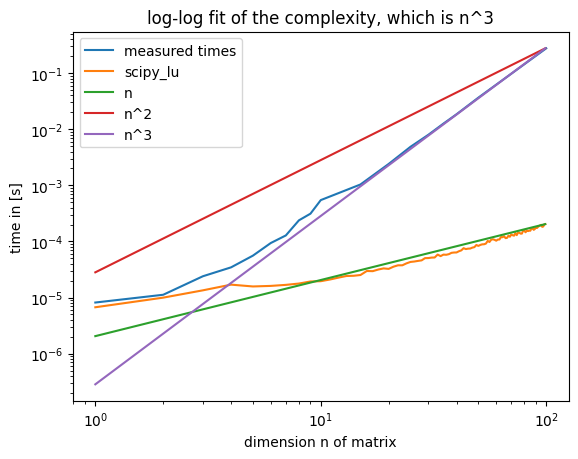

In [25]:
nres = [i.best for i in res]

nres2 = [i.best for i in res2]
xnew = np.linspace(xax2[0], xax2[-1], 1000)
fit2 = np.polyfit(xax2, nres2, 3)
func2 = np.poly1d(fit2)


f = max(nres2) / max(xnew)
y1 = [i * f for i in xnew]

y2 = [i**2 for i in xnew]
f = max(nres) / max(y2)
y2 = [i * f for i in y2]

y3 = [i**3 for i in xnew]
f = max(nres) / max(y3)
y3 = [i * f for i in y3]

plt.plot(xax, nres)
plt.plot(xax2, nres2)
plt.plot(xnew, y1)
plt.plot(xnew, y2)
plt.plot(xnew, y3)
plt.loglog()
plt.xlabel("dimension n of matrix")
plt.ylabel("time in [s]")
plt.title("log-log fit of the complexity, which is n^3")
plt.legend(["measured times", "scipy_lu", "n", "n^2", "n^3"])

In [24]:
F = np.flip(np.identity(4), axis=0)
print(LU(F))

(array([[ 1.,  0.,  0.,  0.],
       [nan,  1.,  0.,  0.],
       [nan, nan,  1.,  0.],
       [inf, nan, nan,  1.]]), array([[ 0.,  0.,  0.,  1.],
       [ 0., nan, nan, nan],
       [ 0.,  0., nan, nan],
       [ 0.,  0.,  0., nan]]))


C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:13: RuntimeWarning: invalid value encountered in scalar divide
  L[j, i] /= U[i, i]
C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  L[j, i] /= U[i, i]
C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_11576\1820361530.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  L[j, i] -= L[j, k] * U[k, i]


## It's not difficult to see, that zero divisions can happen, even though the problem is full rank and therefore solvable.
Pivoting is required to solve this problem. This is done by always making sure, that the next step in the prozess uses the highest number in the column, by flipping entire rows of the matrix wiht one another to guarantee this.